In [20]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
%matplotlib inline 

from planning_utils import create_grid

plt.rcParams['figure.figsize'] = 12, 12

In [21]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
filename = 'colliders_new.csv'
data_new = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


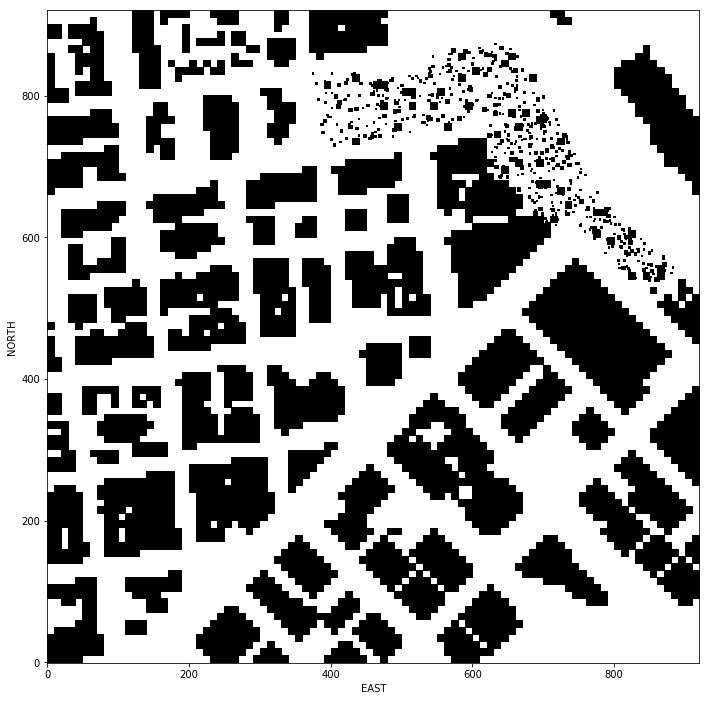

In [26]:
# Static drone altitude (metres)
drone_altitude = 0.1
safety_distance = 0

grid, northmin, eastmin = create_grid(data, drone_altitude, safety_distance)

plt.imshow(grid, origin='lower', cmap='Greys') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()


-316
-445


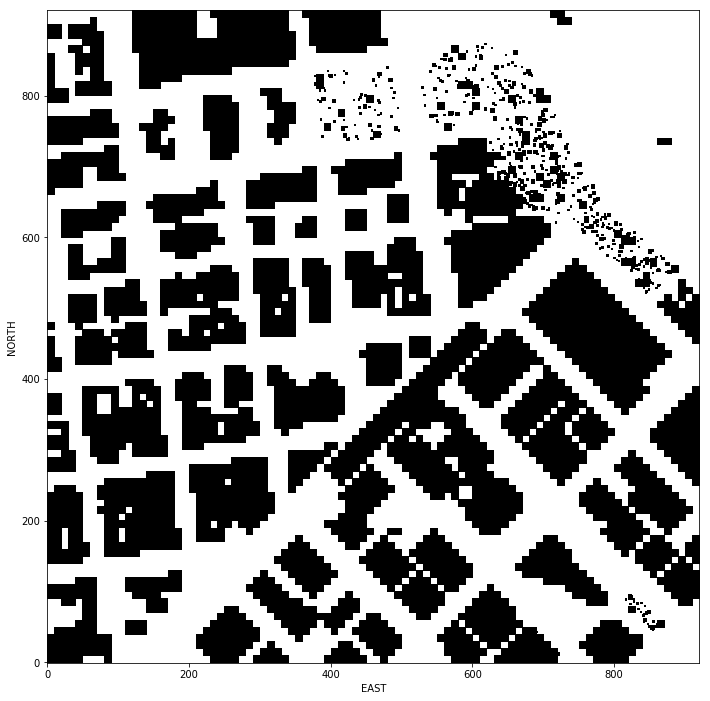

In [32]:
# Static drone altitude (metres)
drone_altitude = 0.1
safety_distance = 0

grid, northmin, eastmin = create_grid(data_new, drone_altitude, safety_distance)
print(northmin)
print(eastmin)

plt.imshow(grid, origin='lower', cmap='Greys') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [101]:
# Get lat0 and lot0 from th first line of colliders.csv
import re

with open("colliders.csv", "r") as file:
    line = file.readline().rstrip()
    data = re.split('[,| ] *', line)
    lat0 = float(data[1])
    lon1 = float(data[3])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12
from bresenham import bresenham

[(-40, -117), (-41, -118), (-43, -118), (-53, -123)]


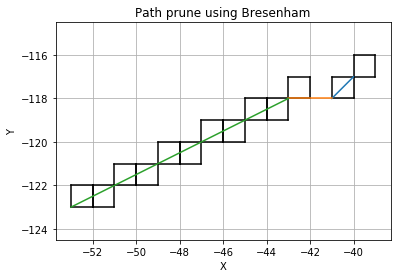

In [58]:
# Path prune using Bresemham
def prune_path_bresenham(path):
    """
    Remove the unnacesary waypoints of the path using Bresenham.
    """
    pruned_path = [p for p in path]
      
    i = 0
    while i < len(pruned_path) - 2:
        p1 = pruned_path[i]
        p2 = pruned_path[i+1]
        p3 = pruned_path[i+2]

        cells = list(bresenham(p1[0], p1[1], p3[0], p3[1]))
        
        i += 1
        for q in cells:
            if(q[0] == p2[0] and q[1] == p2[1]):
                pruned_path.remove(p2)
                i -= 1
                break;
    
    return pruned_path

path = [(-40, -117), 
        (-41,-118),
        (-43,-118),
        (-44,-119),
        (-45,-119),
        (-46,-120),
        (-47,-120),
        (-48,-121),
        (-49,-121),
        (-50,-122),
        (-51,-122),
        (-52,-123),
        (-53,-123)]
        

for q in path:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

path = prune_path_bresenham(path)
    
    
print(path)

i = 0
while i < len(path) - 1:
    p1 = path[i]
    p2 = path[i+1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    i += 1



plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Path prune using Bresenham")
plt.show()

[(-40, -117), (-41, -118), (-43, -118), (-44, -119), (-45, -119), (-46, -120), (-47, -120), (-48, -121), (-49, -121), (-50, -122), (-51, -122), (-52, -123), (-53, -123)]


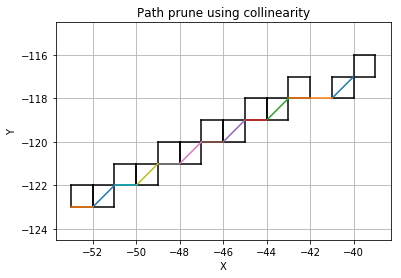

In [59]:
# path  prune using collinearity
def point(p):
    return np.array([p[0], p[1], 1.]).reshape(1, -1)

def collinearity_check(p1, p2, p3, epsilon=1e-6):   
    """
    Check if 3 points are in the same straight line.
    """
    m = np.concatenate((p1, p2, p3), 0)
    det = np.linalg.det(m)
    return abs(det) < epsilon

def prune_path(path):
    """
    Remove the unnacesary waypoints of the path using collinearity.
    """
    pruned_path = [p for p in path]
       
    i = 0
    while i < len(pruned_path) - 2:
        p1 = point(pruned_path[i])
        p2 = point(pruned_path[i+1])
        p3 = point(pruned_path[i+2])
        
        # If the 3 points are in a line remove
        # the 2nd point.
        # The 3rd point now becomes and 2nd point
        # and the check is redone with a new third point
        # on the next iteration.
        if collinearity_check(p1, p2, p3):
            # Something subtle here but we can mutate
            # `pruned_path` freely because the length
            # of the list is check on every iteration.
            pruned_path.remove(pruned_path[i+1])
        else:
            i += 1
    return pruned_path

path = [(-40, -117), 
        (-41,-118),
        (-43,-118),
        (-44,-119),
        (-45,-119),
        (-46,-120),
        (-47,-120),
        (-48,-121),
        (-49,-121),
        (-50,-122),
        (-51,-122),
        (-52,-123),
        (-53,-123)]

for q in path:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

path = prune_path(path)
    
    
print(path)

i = 0
while i < len(path) - 1:
    p1 = path[i]
    p2 = path[i+1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    i += 1



plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Path prune using collinearity")
plt.show()